In [3]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

c:\Users\91944\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data_train = pd.read_csv(r'C:\Users\91944\Downloads\tweets\data_train(n).csv', encoding='utf-8')
data_test = pd.read_csv(r'C:\Users\91944\Downloads\tweets\data_test(n).csv', encoding='utf-8')


X_train = data_train.Text.tolist()
X_test = data_test.Text.tolist()

y_train = data_train.Emotion.tolist()
y_test = data_test.Emotion.tolist()

data = pd.concat([data_train,data_test], ignore_index=True)

class_names = ['joy', 'sadness', 'fear', 'anger', 'neutral']

print('size of training set: %s' % (len(data_train['Text'])))
print('size of validation set: %s' % (len(data_test['Text'])))
print(data.Emotion.value_counts())

data.head(10)

size of training set: 500
size of validation set: 500
Emotion
anger      215
joy        209
sadness    200
fear       195
neutral    181
Name: count, dtype: int64


,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...
5,sadness,When my family heard that my Mother's cousin w...
6,joy,Finding out I am chosen to collect norms for C...
7,anger,A spokesperson said : ` Glen is furious that t...
8,neutral,Yes .
9,sadness,"When I see people with burns I feel sad, actua..."


In [5]:
encoding = {
    'joy': 0,
    'sadness': 1,
    'fear': 2,
    'anger': 3,
    'neutral': 4
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [6]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=200, 
                                                                       max_features=350)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [7]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 200


c:\Users\91944\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [8]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=4)

In [9]:
learner.fit_onecycle(2e-5, 1)



begin training using onecycle policy with max lr of 2e-05...
125/125 [==============================] - ETA: 0s - loss: 1.5238 - accuracy: 0.3540 

KeyboardInterrupt: 

In [21]:
learner.validate(val_data=(x_test,y_test),class_names=class_names)

16/16 [==============================] - 211s 13s/step
              precision    recall  f1-score   support

         joy       0.32      0.17      0.22       106
     sadness       0.21      0.67      0.32        86
        fear       0.19      0.13      0.15       111
       anger       0.00      0.00      0.00       110
     neutral       0.48      0.53      0.50        87

    accuracy                           0.27       500
   macro avg       0.24      0.30      0.24       500
weighted avg       0.23      0.27      0.22       500



c:\Users\91944\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91944\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91944\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

array([[18, 48, 26,  0, 14],
       [10, 58, 10,  0,  8],
       [12, 78, 14,  0,  7],
       [10, 74,  5,  0, 21],
       [ 6, 15, 20,  0, 46]], dtype=int64)

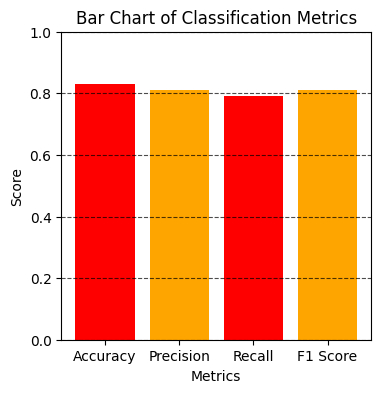

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for accuracy, precision, recall, and F1 score
accuracy = 0.83
precision = 0.81
recall= 0.79
f1_score=0.81

metrics = [accuracy, precision, recall, f1_score]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a bar chart
plt.figure(figsize=(4,4))
plt.bar(labels, metrics, color=['red', 'orange', 'red', 'orange'])
plt.ylim(0,1)  # Set the y-axis limit from 0 to 1 (assuming metrics are in the range [0, 1])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Bar Chart of Classification Metrics')
plt.grid(axis='y', linestyle='--', color='black',alpha=0.7)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_train
predicted = y_test

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [2]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

NameError: name 'ktrain' is not defined

In [1]:
import time 

message = 'I guess so'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

NameError: name 'predictor' is not defined

In [ ]:
# let's save the predictor for later use
predictor.save("models/bert_model")